# Define Project

Link: https://www.kaggle.com/datasets/ayaz11/used-car-price-prediction

The dataset in question, meticulously collected via the process of web scraping from the widely recognized U.S. platform dedicated to pre-owned automobiles, Truecars.com, embodies a comprehensive arrangement of information encapsulated within six distinct columns. These columns, upon thorough analysis and manipulation, possess the potential to be transformed and expanded into an array of additional features through the process known as feature engineering. This dataset stands out as exceptionally conducive for the construction and refinement of regression models, owing to its rich and diverse content, which offers ample opportunities for exploring correlations, patterns, and predictive insights within the realm of automotive market dynamics.


In [130]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading & Initial Look

In [131]:
df=pd.read_csv("car_web_scraped_dataset.csv")

df.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
3,Honda Civic,2020,"37,190 miles","Blue exterior, Black interior","No accidents reported, 1 Owner","$18,998"
4,Honda Civic,2020,"27,496 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$19,498"


# Data Understanding

In [132]:
# Checking the number of rows and columns

df.shape

(2840, 6)

In [133]:
# Checking descriptive analaysis of dataset

df.describe()

,year
count,2840.000000
mean,2018.833803
std,3.557585
min,2000.000000
25%,2017.000000
50%,2020.000000
75%,2021.000000
max,2024.000000


In [134]:
# Checking for missing values

df.isnull().sum()

name         0
year         0
miles        0
color        0
condition    0
price        0
dtype: int64

In [135]:
# Checking the data types of each column

print(df.dtypes)

name         object
year          int64
miles        object
color        object
condition    object
price        object
dtype: object


In [136]:
# Checking for duplicates

duplicate_rows= df.duplicated().sum()
print(duplicate_rows)

528


# Data Cleaning

In [137]:
# Dropping the duplicate rows

df=df.drop_duplicates()

In [138]:
# Number of rows and columns after removing the duplicates

df.shape

(2312, 6)

In [139]:
# Capitalize column names

df.rename(columns={col: col.capitalize() for col in df.columns}, inplace=True)

In [140]:
# Check for invalid entries

invalid_entries = df[df.select_dtypes(include=['number']) < 0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 Name         0
Year         0
Miles        0
Color        0
Condition    0
Price        0
dtype: int64


# Dealing with each columns one by one

In [141]:
# Checking the uniquess of the 'name' column

df["Name"].unique()

array(['Kia Forte', 'Chevrolet Silverado 1500', 'Toyota RAV4',
       'Honda Civic', 'Honda Accord', 'Mercedes-Benz GLC', 'BMW 5 Series',
       'Jeep Wrangler', 'Porsche Macan', 'Buick Cascada', 'BMW 3 Series',
       'Jeep Grand Cherokee', 'Mercedes-Benz C-Class', 'Porsche Cayenne',
       'Honda Odyssey', 'BMW 7 Series', 'Kia K5', 'Nissan Kicks',
       'Honda CR-V', 'Chrysler Pacifica', 'Volkswagen Tiguan',
       'Nissan Sentra', 'Toyota Camry', 'Chevrolet Malibu',
       'Chevrolet Volt', 'Land Rover Range Rover Sport',
       'Toyota Highlander', 'Kia Optima', 'Dodge Charger',
       'Toyota Corolla', 'Toyota Tacoma', 'Toyota 4Runner',
       'Ford Mustang', 'Ford F-150', 'Honda Pilot', 'Nissan Rogue Sport',
       'INFINITI QX60', 'Volvo XC60', 'Ford Explorer',
       'Chevrolet Equinox', 'Mercedes-Benz GLE', 'Mercedes-Benz S-Class',
       'Volvo S90', 'BMW X3', 'Mercedes-Benz GLS', 'Ford Bronco Sport',
       'Mitsubishi Outlander Sport', 'Volvo XC90', 'Lexus RX',
       'Mer

In [142]:
# Split 'Name' into two columns 'Brand' and 'Model' and drop 'Name'

df["Brand"]=df['Name'].str.split().str.slice(0,1).str.join(" ")
df["Model"]=df['Name'].str.split().str.slice(1,).str.join(" ")
df.drop("Name",axis=1,inplace=True)

In [143]:
# Remove 'miles' unit and commas from 'miles' column

df['Miles'] = df['Miles'].str.replace('miles', '').str.replace(',', '')

In [144]:
# Remove $ sign and commas from 'price' column

df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

In [145]:
# Splitting the 'condition' into two columns based on comma

df[['Num_of_Accidents', 'Num_of_Owners']] = df['Condition'].str.split(',', expand=True)

# Drop the original 'condition' column
df.drop(columns=['Condition'], inplace=True)

In [146]:
# Splitting the 'color' into two columns based on comma

df[['Exterior_Color', 'Interior_Color']] = df['Color'].str.split(',', expand=True)

# Drop the original 'color' column
df.drop(columns=['Color'], inplace=True)

In [147]:
df

# Now, we can easily the difference after encoding

,Year,Miles,Price,Brand,Model,Num_of_Accidents,Num_of_Owners,Exterior_Color,Interior_Color
0,2022,41406,15988,Kia,Forte,No accidents reported,1 Owner,Gray exterior,Black interior
1,2021,15138,38008,Chevrolet,Silverado 1500,1 accident reported,1 Owner,White exterior,Black interior
2,2022,32879,24988,Toyota,RAV4,No accidents reported,1 Owner,Silver exterior,Unknown interior
3,2020,37190,18998,Honda,Civic,No accidents reported,1 Owner,Blue exterior,Black interior
4,2020,27496,19498,Honda,Civic,No accidents reported,1 Owner,Black exterior,Black interior
...,...,...,...,...,...,...,...,...,...
2835,2013,98601,8995,Ford,Escape,2 accidents reported,3 Owners,Silver exterior,Unknown interior
2836,2009,120694,9495,Mercedes-Benz,R-Class,1 accident reported,3 Owners,Black exterior,Black interior
2837,2022,27894,29999,Mercedes-Benz,GLC,No accidents reported,2 Owners,Gray exterior,Gray interior
2838,2021,50220,22992,Honda,CR-V,No accidents reported,1 Owner,Gray exterior,Unknown interior


# Now, dealing with updated columns to clean and modify

In [148]:
df['Num_of_Accidents'].unique()

array(['No accidents reported', '1 accident reported',
       '3 accidents reported', '2 accidents reported',
       '5 accidents reported', '4 accidents reported'], dtype=object)

In [149]:
# Defien a dictionary to map string to numerical values

accident_mapping= {'No accidents reported':0,
                  '1 accident reported':1,
                  '2 accidents reported':2,
                  '3 accidents reported':3,
                  '4 accidents reported':4,
                  '5 accidents reported':5}

df['Num_of_Accidents']=df['Num_of_Accidents'].map(accident_mapping)

In [150]:
df['Num_of_Owners'].unique()

array([' 1 Owner', ' 3 Owners', ' 2 Owners', ' 5 Owners', ' 4 Owners',
       ' 0 Owners', ' 7 Owners', ' 8 Owners'], dtype=object)

In [151]:
# mapping string to numerical values on "Num_of_Owners" col

owners_mapping= {' 0 Owners':0, ' 1 Owner':1,
                ' 2 Owners':2, ' 3 Owners':3,
                ' 4 Owners':4, ' 5 Owners':5,
                ' 7 Owners':7, ' 8 Owners':8}

df['Num_of_Owners']= df['Num_of_Owners'].map(owners_mapping)

I did the mapping algorithm to convert the categorical variables into numerical variables.

# Extraction

In [152]:
print(df["Exterior_Color"].unique())
print(df["Interior_Color"].unique())

['Gray exterior' 'White exterior' 'Silver exterior' 'Blue exterior'
 'Black exterior' 'Red exterior' 'Orange exterior' 'Green exterior'
 'Tan exterior' 'Unknown exterior' 'Gold exterior' 'Yellow exterior'
 'Brown exterior' 'Purple exterior']
[' Black interior' ' Unknown interior' ' Beige interior' ' Brown interior'
 ' Gray interior' ' Orange interior' ' Red interior' ' Green interior'
 ' White interior' ' Blue interior' ' Yellow interior']


In [153]:
# Extracting the first word from 'text_column'

df['Exterior_Color'] = df['Exterior_Color'].str.split().str[0]
df['Interior_Color'] = df['Interior_Color'].str.split().str[0]

In [154]:
df.head()

,Year,Miles,Price,Brand,Model,Num_of_Accidents,Num_of_Owners,Exterior_Color,Interior_Color
0,2022,41406,15988,Kia,Forte,0,1,Gray,Black
1,2021,15138,38008,Chevrolet,Silverado 1500,1,1,White,Black
2,2022,32879,24988,Toyota,RAV4,0,1,Silver,Unknown
3,2020,37190,18998,Honda,Civic,0,1,Blue,Black
4,2020,27496,19498,Honda,Civic,0,1,Black,Black


# Conversion from string to numerical

In [155]:
df['Miles']=df['Miles'].astype(int)
df['Price']=df['Price'].astype(int)

In [156]:
print(df.dtypes)

Year                 int64
Miles                int64
Price                int64
Brand               object
Model               object
Num_of_Accidents     int64
Num_of_Owners        int64
Exterior_Color      object
Interior_Color      object
dtype: object


## Finally, we are able to see the descriptive analysis of most of the columns

In [157]:
df.describe()

,Year,Miles,Price,Num_of_Accidents,Num_of_Owners
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000
mean,2018.873702,49896.590398,25841.419983,0.281142,1.504325
std,3.466794,36287.386865,13880.328572,0.593947,0.852607
min,2000.000000,25.000000,4395.000000,0.000000,0.000000
25%,2017.000000,23590.250000,17991.000000,0.000000,1.000000
50%,2020.000000,40703.000000,22999.000000,0.000000,1.000000
75%,2021.000000,69360.250000,30999.250000,0.000000,2.000000
max,2024.000000,307292.000000,252900.000000,5.000000,8.000000


# Data Visualization

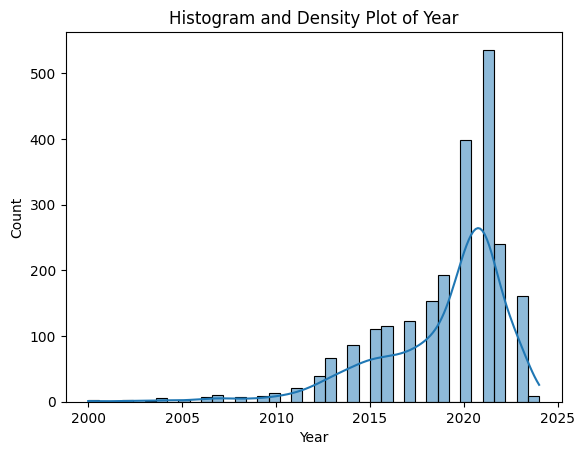

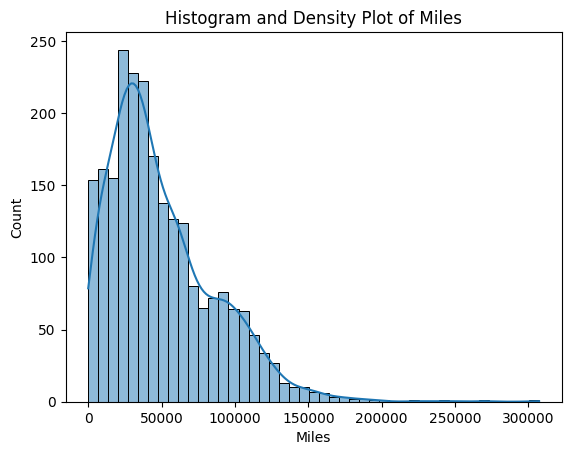

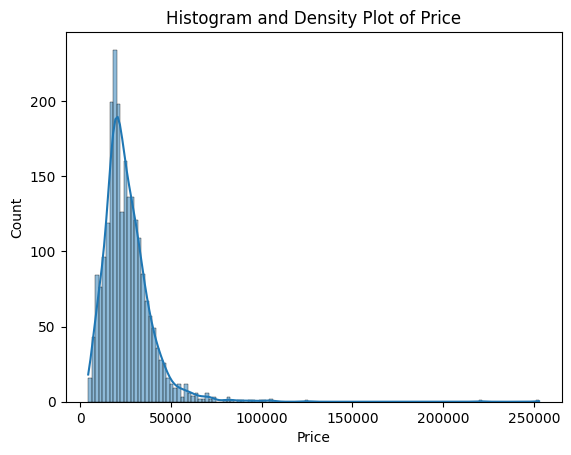

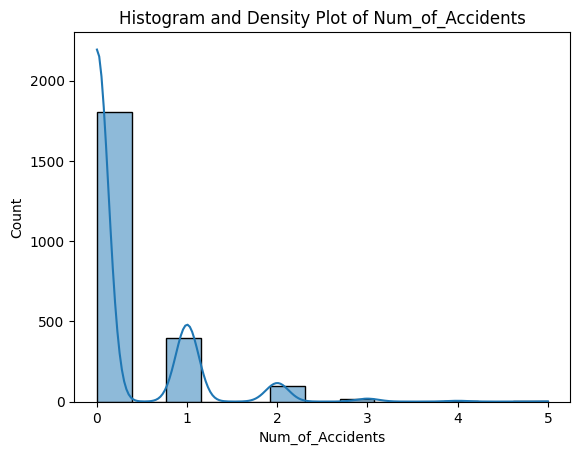

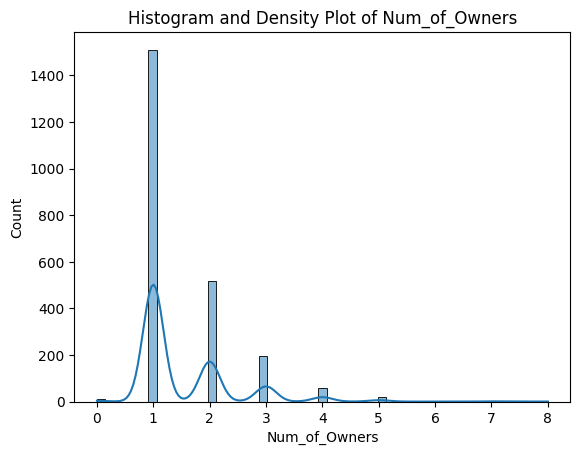

In [158]:
# Histograms and density plots

for col in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram and Density Plot of {col}')
    plt.show()

Comment: I did histogram of each numerical columns to see the distribution of the variables. Also, to observe how the datasets are actually and to see the skeness of the variables.


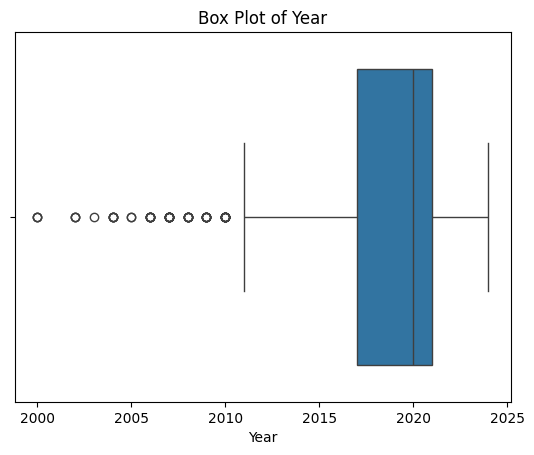

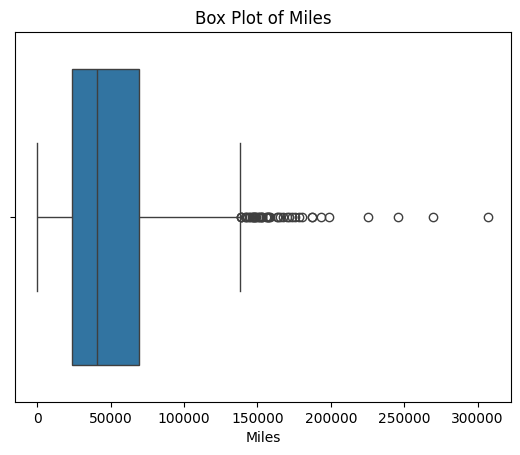

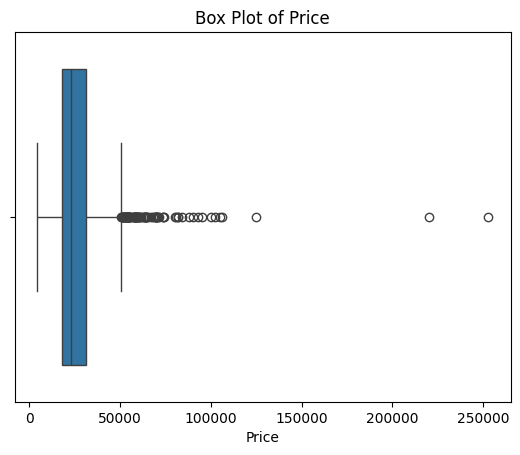

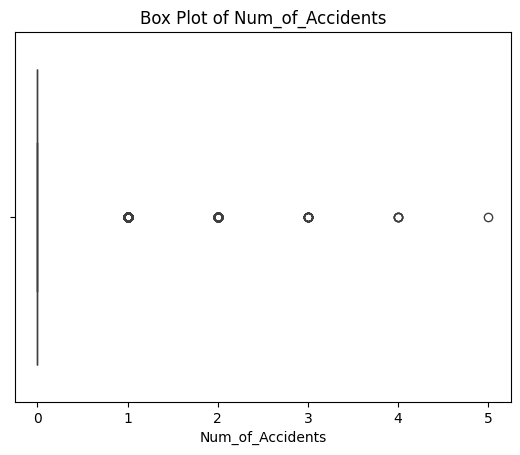

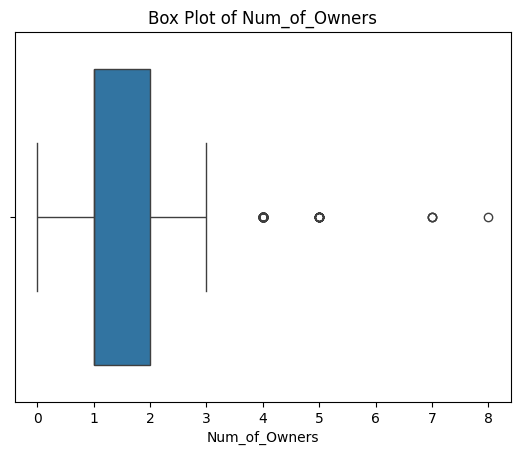

In [159]:
# Box plots for numerical variables

for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Comment: I did the box plot to see the outlier of each numerical columns. In Year, Num_of_Accidents, and Num_of_Owners, I see the oultier as dot-dot because those are not exactly the outlier. So, I will not deal with these columns. The columns that I will deal to remover outlier would be Miles and Price columns to remove the model performance.

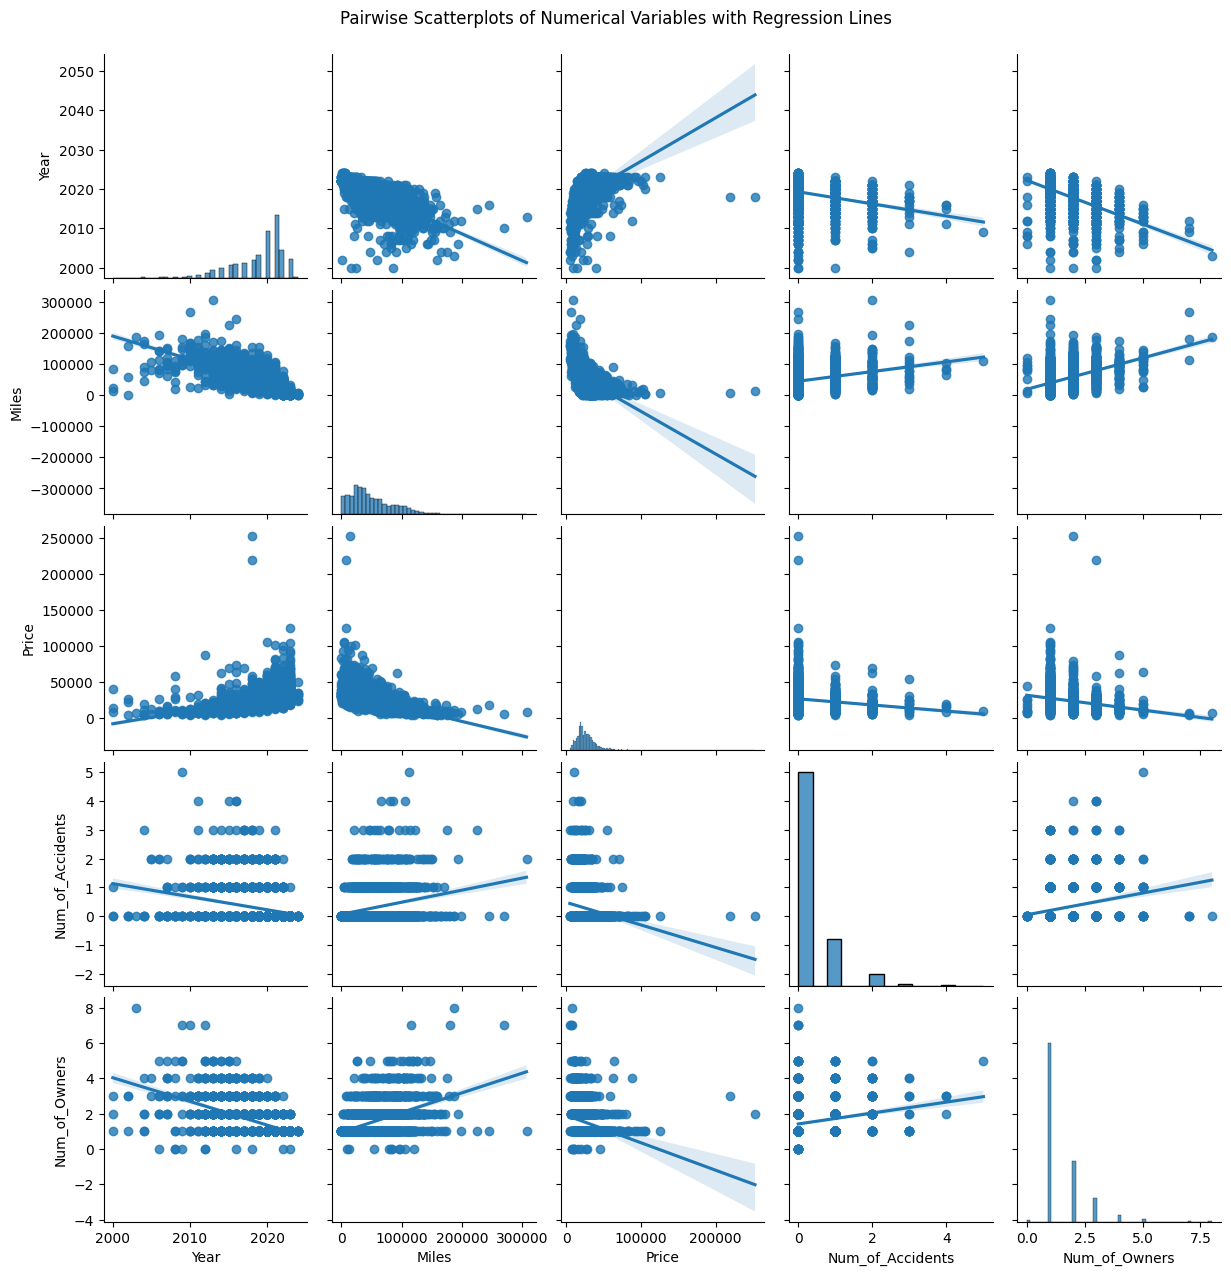

In [160]:
# Scatterplots for relationships between numerical variables

sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle('Pairwise Scatterplots of Numerical Variables with Regression Lines', y=1.02)
plt.show()

# Handling Outliers

In [161]:
# Define bounds for capping 'Miles' outliers

Q1_mile= df['Miles'].quantile(0.25)
Q3_mile= df['Miles'].quantile(0.75)
IQR_mile= Q3_mile - Q1_mile
lower_bound_mile= Q1_mile - 1.5*IQR_mile
upper_bound_mile= Q3_mile + 1.5*IQR_mile

df['Miles']= df['Miles'].clip(lower=lower_bound_mile, upper=upper_bound_mile)

In [162]:
# For 'Price' outliers

Q1_price= df['Price'].quantile(0.25)
Q3_price= df['Price'].quantile(0.75)
IQR_price= Q3_price - Q1_price
lower_bound_price= Q1_price - 1.5*IQR_price
upper_bound_price= Q3_price + 1.5*IQR_price

# Identify indices for Price outlier
outlier_indices_price= df[(df['Price'] < lower_bound_price) | (df['Price'] > upper_bound_price)].index

# Remove 'Price' outlier
df=df.drop(index=outlier_indices_price)

Comment: I have removed the outliers from 'Miles' and 'Price' columns by inter-quater range (IQR) algorithm. This will help me for better performance of my model evaluation and performance.

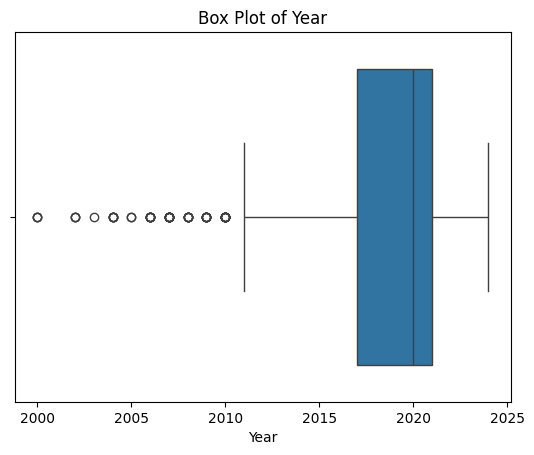

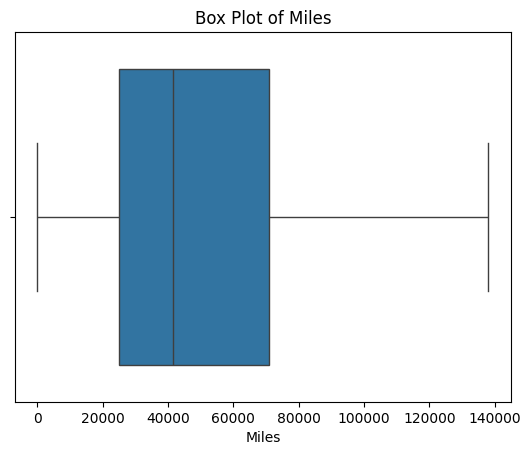

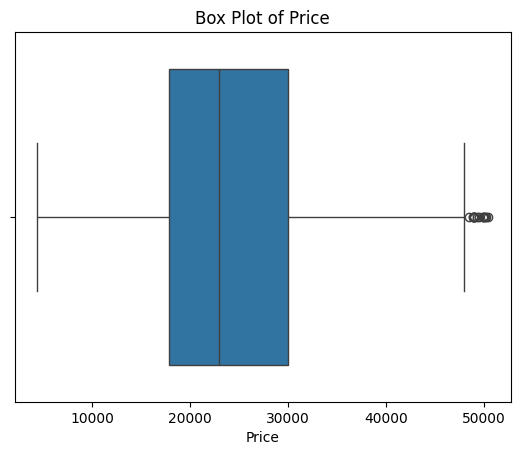

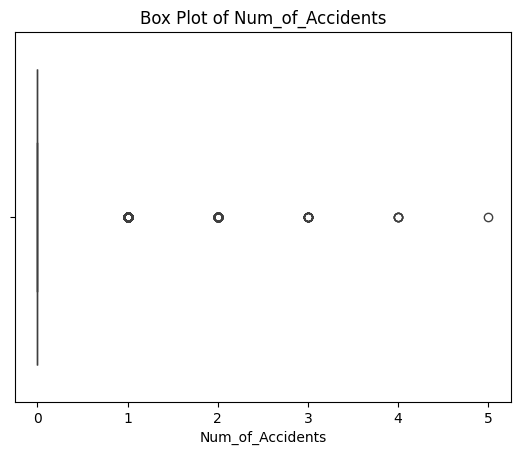

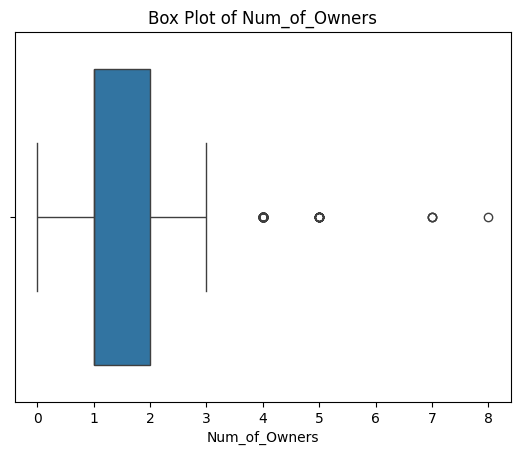

In [163]:
# Let's check the box plot after outlier removal

for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [164]:
# Check Changes:

summary_changes= {'Rows After Price Outlier Removal': df.shape[0]}

summary_changes, df[['Miles', 'Price']].describe()

({'Rows After Price Outlier Removal': 2224},
                Miles         Price
 count    2224.000000   2224.000000
 mean    50527.810814  24129.132194
 std     34225.582903   9417.308638
 min        25.000000   4395.000000
 25%     24997.000000  17800.000000
 50%     41560.500000  22987.500000
 75%     71000.750000  29999.000000
 max    138015.250000  50491.000000)

# LabelEncoding

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

column_to_encode= ['Brand','Model','Exterior_Color', 'Interior_Color']
for column in column_to_encode:
    df.loc[:, column]= encoder.fit_transform(df[column])

In [72]:
# Now we can easily see LabelEncoder modification on dataset

df

,Year,Miles,Price,Brand,Model,Num_of_Accidents,Num_of_Owners,Exterior_Color,Interior_Color
0,2022,41406.0,15988,20,106,0,1,4,1
1,2021,15138.0,38008,8,236,1,1,12,1
2,2022,32879.0,24988,36,198,0,1,9,6
3,2020,37190.0,18998,15,67,0,1,1,1
4,2020,27496.0,19498,15,67,0,1,0,1
...,...,...,...,...,...,...,...,...,...
2835,2013,98601.0,8995,12,93,2,3,9,6
2836,2009,120694.0,9495,27,197,1,3,0,1
2837,2022,27894.0,29999,27,114,0,2,4,4
2838,2021,50220.0,22992,15,48,0,1,4,6


#DEEP LEARNING

In [176]:
# Split Data
X= df.drop(columns=['Price'])
y= (df['Price'])

Here, y is my target variable and X are independent variables which will affect the my target variable 'Price'.

In [177]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

I am keeping 80% as training dataset and 20% as my testing dataset

In [178]:
import tensorflow as tf

# Let's build our first model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [179]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Comment: This is my first model with two hidden layers, with 64 and 64 neuorons in eacg layers respectively.

In [180]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4545 (17.75 KB)
Trainable params: 4545 (17.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Comment: I still see the categorical values in my X_train which will cause problem in running the model. So, I am going to change it to numerical to avoid the issue.

In [181]:
from sklearn.impute import SimpleImputer

# Convert non-numeric columns to numeric format
X_train_numeric = X_train.astype(float)

# Replace non-numeric values with NaN
X_train_numeric[X_train_numeric == ''] = np.nan

In [182]:
history=model.fit(X_train_numeric,
                  y_train,
                  validation_data=(X_test.astype("float"),y_test),
                  epochs=100, batch_size=10)

Epoch 1/100
178/178 [==============================] - 1s 4ms/step - loss: 339371808.0000 - mae: 15424.3076 - val_loss: 228676144.0000 - val_mae: 12316.7588
Epoch 2/100
178/178 [==============================] - 1s 3ms/step - loss: 121032712.0000 - mae: 8468.8232 - val_loss: 61864468.0000 - val_mae: 6575.1055
Epoch 3/100
178/178 [==============================] - 1s 3ms/step - loss: 56893024.0000 - mae: 5949.5752 - val_loss: 53504672.0000 - val_mae: 5713.8799
Epoch 4/100
178/178 [==============================] - 1s 3ms/step - loss: 56039336.0000 - mae: 5936.3950 - val_loss: 52510864.0000 - val_mae: 5795.5229
Epoch 5/100
178/178 [==============================] - 1s 3ms/step - loss: 56327916.0000 - mae: 5904.4014 - val_loss: 57137560.0000 - val_mae: 5687.5645
Epoch 6/100
178/178 [==============================] - 0s 3ms/step - loss: 55331080.0000 - mae: 5874.2578 - val_loss: 53418728.0000 - val_mae: 5944.7036
Epoch 7/100
178/178 [==============================] - 0s 3ms/step - loss: 54

I am keeping 100 epoch to see how it goes as an epoch is defined as one training pass using the whole training data.

In [183]:
print(history.history)

{'loss': [339371808.0, 121032712.0, 56893024.0, 56039336.0, 56327916.0, 55331080.0, 54493680.0, 52790956.0, 53810360.0, 54925168.0, 53198708.0, 54156508.0, 54448472.0, 52454896.0, 53541888.0, 53768492.0, 54057800.0, 52562516.0, 55063100.0, 52612368.0, 55502388.0, 53617208.0, 54015496.0, 55453692.0, 53345636.0, 54104684.0, 53770280.0, 52244548.0, 52965852.0, 53379856.0, 53277936.0, 52812076.0, 54355856.0, 53130376.0, 53770524.0, 54858176.0, 52747736.0, 53637296.0, 53533284.0, 54586280.0, 52415860.0, 52018168.0, 52925004.0, 53243528.0, 52574152.0, 53310580.0, 52952088.0, 53442592.0, 52838240.0, 53775600.0, 52979468.0, 52164644.0, 53202840.0, 52277204.0, 53344072.0, 52470772.0, 52552292.0, 52625108.0, 52109416.0, 52563184.0, 52956444.0, 51993772.0, 54771680.0, 52728484.0, 51906420.0, 53313384.0, 52007332.0, 51959664.0, 53366000.0, 52231276.0, 52861664.0, 52528128.0, 52846552.0, 51724908.0, 52164652.0, 52328848.0, 52227940.0, 52777428.0, 52227788.0, 53960240.0, 51569708.0, 52339356.0, 5263

Comment: The model history keeps track of the loss and accuracy for each epoch.

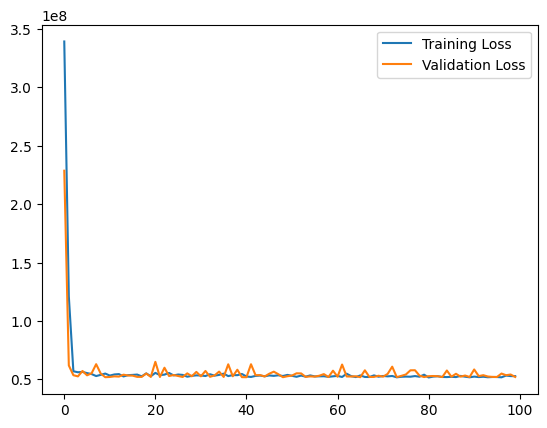

In [184]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

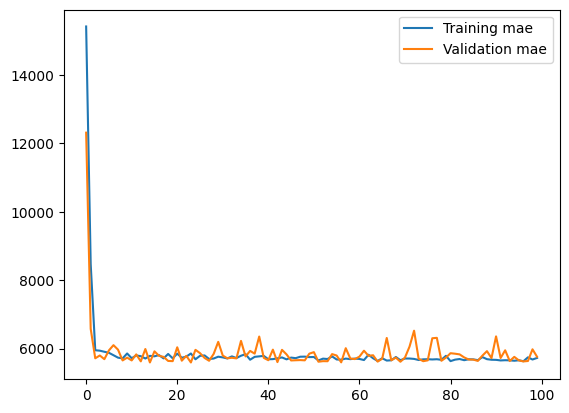

In [185]:
plt.plot(range(len(history.history["mae"])),history.history["mae"],label="Training mae")
plt.plot(range(len(history.history["val_mae"])),history.history["val_mae"],label="Validation mae")
plt.legend()

I can evaluate how the trained model does on the test sample as follows:

In [186]:
scores = model.evaluate(X_test.astype("float"), y_test)
print(scores)

14/14 [==============================] - 0s 2ms/step - loss: 52028592.0000 - mae: 5758.7197
[52028592.0, 5758.7197265625]


Finally, I can see my model evaluation by looking at scores which I got. In this project, I deal with a dataset of regression problem. So, I do not use the accuracy and roc curve as they are only used for classification problem. It was an interesting project to work on the deep learning concept.